<a href="https://colab.research.google.com/github/Benemrxr/GSERM2022-Lab-Deep-Learning/blob/main/exam_personal/exam_exercise_mb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="center" style="max-width: 1000px" src="https://github.com/Benemrxr/GSERM2022-Lab-Deep-Learning/blob/main/exam_personal/banner.png?raw=1">

<img align="right" style="max-width: 200px; height: auto" src="https://github.com/Benemrxr/GSERM2022-Lab-Deep-Learning/blob/main/exam_personal/hsg_logo.png?raw=1">

##  Exam - Fashion MNIST Convolutional Neural Networks (CNNs)

GSERM'22 course "Deep Learning: Fundamentals and Applications", University of St. Gallen

This week we have learned how to enhance vanilla Artificial Neural Networks (ANNs) using `PyTorch` to classify even more complex images. For this purpose, we used a special type of deep neural network referred to **Convolutional Neural Networks (CNNs)**. In our exam exercise, we aim to leverage that knowledge by applying it to the known Fashion-MNIST dataset.

As always, pls. don't hesitate to post your potential questions on CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email: aiml-teaching.ics@unisg.ch).

## 1. Assignment Objectives:

As discussed in our last session, these are the tasks for the exam exercise:

> 1. Load the Fashion **MNIST dataset**. 
> 2. Implement a **CNN** architecture able to work with this data.
> 3. **Train** the model, evaluate its **performance** and visualize the results.
> 4. Try to **improve** the performance of the initial model.
> 5. **Document** the results in the form of PowerPoint slides.

But before we do so let's start (as always) with a motivational video by NVIDIA. Happy coding! 

In [ ]:
from IPython.display import YouTubeVideo
# Official Intro | GTC 2020 | I AM AI"
# YouTubeVideo('e2_hsjpTi4w', width=800, height=500)

## 2. Setup of the Jupyter Notebook Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. We will mostly use the `PyTorch`, `Numpy`, `Sklearn`, `Matplotlib`, `Seaborn` and a few utility libraries throughout this lab:

In [1]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

Import Python machine / deep learning libraries:

In [2]:
# import the PyTorch deep learning library
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

Import the sklearn classification metrics:

In [3]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Import Python plotting libraries:

In [4]:
# import matplotlib, seaborn, and PIL data visualization libary
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Enable notebook matplotlib inline plotting:

In [5]:
%matplotlib inline

Import Google's GDrive connector and mount your GDrive directories:

In [6]:
# import the Google Colab GDrive connector
from google.colab import drive

# mount GDrive inside the Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


Create a structure of Colab Notebook sub-directories inside of GDrive to store (1) the data as well as (2) the trained neural network models:

In [7]:
# create Colab Notebooks directory
notebook_directory = '/content/drive/MyDrive/Colab Notebooks'
if not os.path.exists(notebook_directory): os.makedirs(notebook_directory)

 # create data sub-directory inside the Colab Notebooks directory
data_directory = '/content/drive/MyDrive/Colab Notebooks/data'
if not os.path.exists(data_directory): os.makedirs(data_directory)

 # create models sub-directory inside the Colab Notebooks directory
models_directory = '/content/drive/MyDrive/Colab Notebooks/models'
if not os.path.exists(models_directory): os.makedirs(models_directory)

Set a random `seed` value to obtain reproducable results:

In [8]:
# init deterministic seed
seed_value = 1234
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU

Google Colab provides the use of free GPUs for running notebooks. However, if you just execute this notebook as is, it will use your device's CPU. To run the lab on a GPU, got to `Runtime` > `Change runtime type` and set the Runtime type to `GPU` in the drop-down. Running this lab on a CPU is fine, but you will find that GPU computing is faster. *CUDA* indicates that the lab is being run on GPU.

Enable GPU computing by setting the `device` flag and init a `CUDA` seed:

In [9]:
# set cpu or gpu enabled device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu').type

# init deterministic GPU seed
torch.cuda.manual_seed(seed_value)

# log type of device enabled
print('[LOG] notebook with {} computation enabled'.format(str(device)))

[LOG] notebook with cuda computation enabled


Let's determine if we have access to a GPU provided by e.g. Google's COLab environment:

In [10]:
!nvidia-smi

Fri Jul 15 08:16:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 3. Exam Exercise: Convolutional Neural Networks (CNNs)

The **Fashion-MNIST database** is a large database of Zalando articles that is commonly used for training various image processing systems. The database is widely used for training and testing in the field of machine learning. Source: https://www.kaggle.com/c/insar-fashion-mnist-challenge

### 3.1 Fashion-MNIST Dataset Download and Data Assessment

Correct number of training data images (60000)
Correct number of evaluation data images (10000)


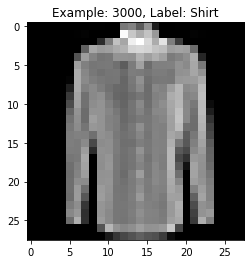

In [11]:
# To solve this task you might want to have a look at the code of exercise 4.

#### Step 1. define "train" path ###############################################

train_path = data_directory + '/train_fmnist'



#### Step 2. define transformations and download the "train" dataset ############

# define pytorch transformation into tensor format
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# download and transform training images
fashion_mnist_train_data = torchvision.datasets.FashionMNIST(root=train_path, 
                                                             train=True, 
                                                             transform=transf, 
                                                             download=True)

# determine the number of training data images / verify we have all 60'000 images
if len(fashion_mnist_train_data) == 60000:
  print('Correct number of training data images ({})'.format(len(fashion_mnist_train_data)))
else: 
  print('Incorrect number of training data images ({})'.format(len(fashion_mnist_train_data)))



#### Step 3. setup/define labels ################################################

# select and set a (random) image id
image_id = 3000
# retrieve image exhibiting the image id
fashion_mnist_train_data[image_id]
fashion_mnist_train_image, fashion_mnist_train_label = fashion_mnist_train_data[image_id]
fashion_mnist_train_label

# Add label descriptions (See https://github.com/zalandoresearch/fashion-mnist)
fashion_classes = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}

fashion_classes[fashion_mnist_train_label]

# define tensor to image transformation
trans = torchvision.transforms.ToPILImage()

# set image plot title 
plt.title('Example: {}, Label: {}'.format(str(image_id), fashion_classes[fashion_mnist_train_label]))

# plot mnist handwritten digit sample
plt.imshow(trans(fashion_mnist_train_image), cmap='gray')



#### Step 4. define "eval" path ################################################

eval_path = data_directory + '/eval_fmnist'



#### Step 5. define transformation and download the "eval" dataset #############

# define pytorch transformation into tensor format
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

# download and transform evaluation images
fashion_mnist_eval_data = torchvision.datasets.FashionMNIST(root=eval_path, 
                                                            train=False, 
                                                            transform=transf, 
                                                            download=True)

# determine the number of evaluation data images / verify we have all 10'000 images
if len(fashion_mnist_eval_data) == 10000:
  print('Correct number of evaluation data images ({})'.format(len(fashion_mnist_eval_data)))
else: 
  print('Incorrect number of evaluation data images ({})'.format(len(fashion_mnist_eval_data)))

### 3.2 Convolutional Neural Network (CNN) Model Training and Evaluation

<img align="center" style="max-width: 900px" src="https://github.com/HSG-AIML/LabAI-Coding/blob/main/resources/lab_05/classification.png?raw=1">

Please note this image of a CNN was defined for the CIFAR-10 dataset. Your Fashion-MNIST images have a different size.


**1. Implement and train your "baseline" CNN.**

In [12]:
# To solve this task you might want to have a look at the code of exercise 5. 
# Please note: the Fashion MNIST dataset only encompasses two dimensions per image (1 channel). 

#### Step 1. define and init neural network architecture #############################################################

# (for this first attempt I closely follow our Cifar10Net structure of the layers, though with adjusted numbers from my ExamNet architecture)

# implement the ExamNet network architecture 
class ExamNet(nn.Module):
    
    # define the class constructor
    def __init__(self):
        
        # call super class constructor
        super(ExamNet, self).__init__()
        
        # specify convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
        
        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # specify convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, stride=1, padding=0)
        
        # define max-pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # specify fc layer 1 - in 12 * 4 * 4, out 120
        self.linear1 = nn.Linear(12 * 4 * 4, 120, bias=True) # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True) # the non-linearity
        
        # specify fc layer 2 - in 120, out 84
        self.linear2 = nn.Linear(120, 84, bias=True) # the linearity W*x+b
        self.relu2 = nn.ReLU(inplace=True) # the non-linarity
        
        # specify fc layer 3 - in 84, out 10
        self.linear3 = nn.Linear(84, 10) # the linearity W*x+b
        
        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1) # the softmax
        
    # define network forward pass
    def forward(self, images):
        
        # high-level feature learning via convolutional layers
        
        # define conv layer 1 forward pass
        x = self.pool1(self.relu1(self.conv1(images)))
        
        # define conv layer 2 forward pass
        x = self.pool2(self.relu2(self.conv2(x)))
        
        # feature flattening
        
        # reshape image pixels
        x = x.view(-1, 12 * 4 * 4)
        
        # combination of feature learning via non-linear layers
        
        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))
        
        # define fc layer 2 forward pass
        x = self.relu2(self.linear2(x))
        
        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))
        
        # return forward pass result
        return x

model = ExamNet()
model = model.to(device)

# print the initialized architectures
print('[LOG] ExamNet architecture:\n\n{}\n'.format(model))

# init the number of model parameters
num_params = 0
# iterate over the distinct parameters
for param in model.parameters():
    # collect number of parameters
    num_params += param.numel()   
# print the number of model paramters
print('[LOG] Number of to be trained ExamNet model parameters: {}.'.format(num_params))



[LOG] ExamNet architecture:

ExamNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=192, out_features=120, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

[LOG] Number of to be trained ExamNet model parameters: 36142.


In [13]:
#### Step 2. define loss, training hyperparameters and dataloader ####################################################

# define the optimization criterion / loss function (Negative Log-Likelihood)
nll_loss = nn.NLLLoss()

# push to gpu
nll_loss = nll_loss.to(device)

# define learning rate (0.001) and optimization strategy (Stochastic Gradient Descent)
learning_rate = 0.001
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

# specify the training parameters
num_epochs = 75 # number of training epochs
mini_batch_size = 128 # size of the mini-batches

# PyTorch data loader that feeds the image tensors to our neural network:
fashion_mnist_train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train_data, batch_size=mini_batch_size, shuffle=True)

In [14]:
#### Step 3. run model training ######################################################################################

# init collection of training epoch losses
train_epoch_losses = []

# set the model in training mode
model.train()

# train the ExamNet model
for epoch in range(num_epochs):
    
    # init collection of mini-batch losses
    train_mini_batch_losses = []
    
    # iterate over all-mini batches
    for i, (images, labels) in enumerate(fashion_mnist_train_dataloader):
        
        # push mini-batch data to computation device
        images = images.to(device)
        labels = labels.to(device)

        # run forward pass through the network
        output = model(images)
        
        # reset graph gradients
        model.zero_grad()
        
        # determine classification loss
        loss = nll_loss(output, labels)
        
        # run backward pass
        loss.backward()
        
        # update network paramaters
        optimizer.step()
        
        # collect mini-batch reconstruction loss
        train_mini_batch_losses.append(loss.data.item())

        # wandb (warning: slows down the training)
        # wandb.log({"loss": loss})

        # Optional
        # wandb.watch(model)

    # determine mean min-batch loss of epoch
    train_epoch_loss = np.mean(train_mini_batch_losses)
    
    # print epoch loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))
    
    # set filename of actual model
    model_name = 'exam_model_epoch_{}.pth'.format(str(epoch))

    # save current model to GDrive models directory
    torch.save(model.state_dict(), os.path.join(models_directory, model_name))
    
    # determine mean min-batch loss of epoch
    train_epoch_losses.append(train_epoch_loss)


# [LOG 20220714-08:51:25] epoch: 0 train-loss: 2.3038224919772605
# [LOG 20220714-08:52:28] epoch: 10 train-loss: 2.296164871533034
# [LOG 20220714-08:56:26] epoch: 49 train-loss: 0.6974649136381617
# [LOG 20220714-08:58:45] epoch: 74 train-loss: 0.6072679258612935

# I will use the model with 50 training epochs, saved in my GitHub

[LOG 20220715-08:18:49] epoch: 0 train-loss: 2.3038224919772605
[LOG 20220715-08:18:56] epoch: 1 train-loss: 2.3032176138749763
[LOG 20220715-08:19:03] epoch: 2 train-loss: 2.3026034903170456
[LOG 20220715-08:19:09] epoch: 3 train-loss: 2.301925099480635
[LOG 20220715-08:19:14] epoch: 4 train-loss: 2.3011869108244807
[LOG 20220715-08:19:21] epoch: 5 train-loss: 2.3004295099010346
[LOG 20220715-08:19:27] epoch: 6 train-loss: 2.299647618458469
[LOG 20220715-08:19:32] epoch: 7 train-loss: 2.2988686078647054
[LOG 20220715-08:19:38] epoch: 8 train-loss: 2.2980490107017792
[LOG 20220715-08:19:44] epoch: 9 train-loss: 2.2971545104533115
[LOG 20220715-08:19:50] epoch: 10 train-loss: 2.2961649299938798
[LOG 20220715-08:19:56] epoch: 11 train-loss: 2.295034368917632
[LOG 20220715-08:20:01] epoch: 12 train-loss: 2.2937145294156918
[LOG 20220715-08:20:07] epoch: 13 train-loss: 2.2920780354725525
[LOG 20220715-08:20:13] epoch: 14 train-loss: 2.2900705205352065
[LOG 20220715-08:20:19] epoch: 15 trai

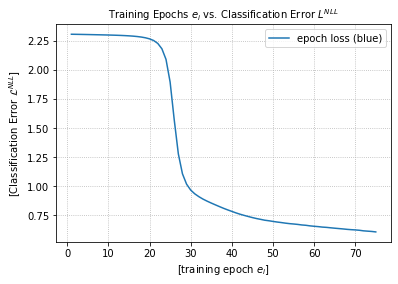

In [15]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot the training epochs vs. the epochs' classification error
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')

# add axis legends
ax.set_xlabel("[training epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)

# set plot legend
plt.legend(loc="upper right", numpoints=1, fancybox=True)

# add plot title
plt.title('Training Epochs $e_i$ vs. Classification Error $L^{NLL}$', fontsize=10);

In [16]:
#### Step 4. run model evaluation ####################################################################################

# restore pre-trained model snapshot ( I used the snapshot at 50 epochs )
best_model_name = 'https://github.com/Benemrxr/GSERM2022-Lab-Deep-Learning/blob/main/exam_personal/exam_model_epoch_49.pth?raw=true'

# read stored model from the remote location
model_bytes = urllib.request.urlopen(best_model_name)

# load model tensor from io.BytesIO object
model_buffer = io.BytesIO(model_bytes.read())

# init pre-trained model class
best_model = ExamNet()

# load pre-trained models
best_model.load_state_dict(torch.load(model_buffer, map_location=torch.device('cpu')))

# set model in evaluation mode
best_model.eval()

ExamNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=192, out_features=120, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

[LOG 20220715-08:27:24] eval-loss: 0.7184029221534729


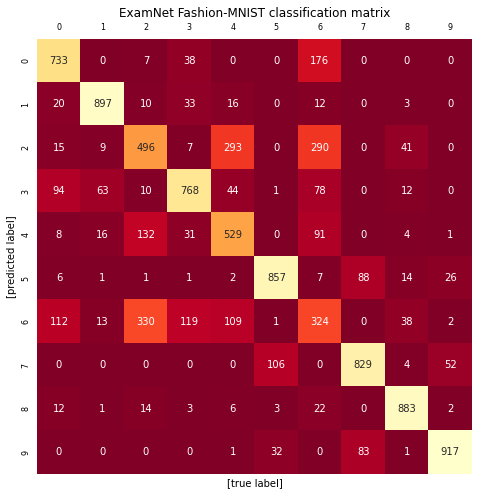

In [17]:
# PyTorch data loader that feeds the (evaluation) image tensors to our neural network:
fashionmnist_eval_dataloader = torch.utils.data.DataLoader(fashion_mnist_eval_data, batch_size=10000, shuffle=False)

# init collection of mini-batch losses
eval_mini_batch_losses = []

# iterate over all-mini batches
for i, (images, labels) in enumerate(fashionmnist_eval_dataloader):

    # run forward pass through the network
    output = best_model(images)

    # determine classification loss
    loss = nll_loss(output, labels)

    # collect mini-batch reconstruction loss
    eval_mini_batch_losses.append(loss.data.item())

# determine mean min-batch loss of epoch
eval_loss = np.mean(eval_mini_batch_losses)

# print epoch loss
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] eval-loss: {}'.format(str(now), str(eval_loss)))
# [LOG 20220714-12:43:04] eval-loss: 0.7184029221534729
# Ok, great. The evaluation loss looks in-line with our training loss.


# Let's now obtain the predictions for all the Fashion-MNIST images of the evaluation data:
predictions = torch.argmax(best_model(iter(fashionmnist_eval_dataloader).next()[0]), dim=1)

# Furthermore, let's obtain the overall classification accuracy:
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())
# 0.7233

# Let's also inspect the confusion matrix of the model predictions to determine major sources of misclassification:
# determine classification matrix of the predicted and target classes
mat = confusion_matrix(fashion_mnist_eval_data.targets, predictions.detach())

# initialize the plot and define size
plt.figure(figsize=(8, 8))

# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fashion_classes, yticklabels=fashion_classes)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# set plot title
plt.title('ExamNet Fashion-MNIST classification matrix')

# set plot axis lables
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

# We can see that our current model confuses the classes 2 and 4, as well as 2 and 6, very often. These are pullovers and coats, and shirts, respectively.

In [18]:
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())

0.7233

**2. Implement and train your "improved" CNN.**
("improved" simply refers to a better classification accuracy than your baseline model)

In [19]:
# init deterministic seed
seed_value = 1234
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU

In [20]:
# To solve this task you might want to have a look at the code of exercise 5. 
# Some ideas might be the addition of layers, addition neurons or convolutions, longer training, smaller learning rate etc. 

#### Step 1. define and init neural network architecture #############################################################

class ExamPassedNet(nn.Module):
    
    # define the class constructor
    def __init__(self):
        
        # call super class constructor
        super(ExamPassedNet, self).__init__()
        
        # specify convolution layer 1.1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=28, kernel_size=5, stride=1, padding=0)

        # specify convolution layer 1.2
        self.conv2 = nn.Conv2d(in_channels=28, out_channels=28, kernel_size=5, stride=1, padding=0)
        
        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # specify convolution layer 2
        self.conv3 = nn.Conv2d(in_channels=28, out_channels=28, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # specify fc layer 1 - in 28 * 3 * 3, out 120
        self.linear1 = nn.Linear(28 * 3 * 3, 120, bias=True) # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True) # the non-linearity
        
        # specify fc layer 2 - in 120, out 84
        self.linear2 = nn.Linear(120, 84, bias=True) # the linearity W*x+b
        self.relu2 = nn.ReLU(inplace=True) # the non-linarity
        
        # specify fc layer 3 - in 84, out 10
        self.linear3 = nn.Linear(84, 10) # the linearity W*x+b
        
        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1) # the softmax
        
    # define network forward pass
    def forward(self, images):
        
        # high-level feature learning via convolutional layers
        
        # define conv layer 1 & 2 forward pass
        x = self.pool1(self.relu1(self.conv2(self.relu1(self.conv1(images)))))
        
        # define conv layer 3 forward pass
        x = self.pool2(self.relu2(self.conv3(x)))
        
        # feature flattening
        
        # reshape image pixels
        x = x.view(-1, 28 * 3 * 3)
        
        # combination of feature learning via non-linear layers
        
        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))
        
        # define fc layer 2 forward pass
        x = self.relu2(self.linear2(x))
        
        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))
        
        # return forward pass result
        return x

improved_model = ExamPassedNet()
improved_model = improved_model.to(device)

!nvidia-smi
# print the initialized architectures
print('[LOG] ExamPassedNet architecture:\n\n{}\n'.format(improved_model))

# init the number of model parameters
num_params = 0
# iterate over the distinct parameters
for param in improved_model.parameters():
    # collect number of parameters
    num_params += param.numel()   
# print the number of model paramters
print('[LOG] Number of to be trained ExamPassedNet model parameters: {}.'.format(num_params))


Fri Jul 15 08:29:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   1158MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
#### Step 2. define loss, training hyperparameters and dataloader ####################################################

# define the optimization criterion / loss function (Negative Log-Likelihood)
nll_loss = nn.NLLLoss()

# push to gpu
nll_loss = nll_loss.to(device)

# define learning rate (0.001) and optimization strategy (Stochastic Gradient Descent)
learning_rate = 0.001
optimizer = optim.SGD(params=improved_model.parameters(), lr=learning_rate)

# specify the training parameters
num_epochs = 75 # number of training epochs
mini_batch_size = 128 # size of the mini-batches

# PyTorch data loader that feeds the image tensors to our neural network:
fashion_mnist_train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train_data, batch_size=mini_batch_size, shuffle=True)

In [22]:
#### Step 3. run model training ######################################################################################

# init collection of training epoch losses
train_epoch_losses = []

# set the model in training mode
improved_model.train()

# train the ExamNet model
for epoch in range(num_epochs):
    
    # init collection of mini-batch losses
    train_mini_batch_losses = []
    
    # iterate over all-mini batches
    for i, (images, labels) in enumerate(fashion_mnist_train_dataloader):
        
        # push mini-batch data to computation device
        images = images.to(device)
        labels = labels.to(device)

        # run forward pass through the network
        output = improved_model(images)
        
        # reset graph gradients
        improved_model.zero_grad()
        
        # determine classification loss
        loss = nll_loss(output, labels)
        
        # run backward pass
        loss.backward()
        
        # update network paramaters
        optimizer.step()
        
        # collect mini-batch reconstruction loss
        train_mini_batch_losses.append(loss.data.item())

        # wandb
        # wandb.log({"loss": loss})

        # Optional
        # wandb.watch(model)

    # determine mean min-batch loss of epoch
    train_epoch_loss = np.mean(train_mini_batch_losses)
    
    # print epoch loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] epoch: {} train-loss: {}'.format(str(now), str(epoch), str(train_epoch_loss)))
    
    # set filename of actual model
    improved_model_name = 'improved_exam_model_epoch_{}.pth'.format(str(epoch))

    # save current model to GDrive models directory
    torch.save(improved_model.state_dict(), os.path.join(models_directory, improved_model_name))
    
    # determine mean min-batch loss of epoch
    train_epoch_losses.append(train_epoch_loss)

# [LOG 20220714-11:38:25] epoch: 0 train-loss: 2.30455591887045
# [LOG 20220714-11:44:00] epoch: 49 train-loss: 0.5967146298651502
# [LOG 20220714-11:46:50] epoch: 74 train-loss: 0.5231550009901336

[LOG 20220715-08:29:54] epoch: 0 train-loss: 2.3045559203955155
[LOG 20220715-08:30:01] epoch: 1 train-loss: 2.3032369705151394
[LOG 20220715-08:30:10] epoch: 2 train-loss: 2.302275233685589
[LOG 20220715-08:30:18] epoch: 3 train-loss: 2.301388675978443
[LOG 20220715-08:30:25] epoch: 4 train-loss: 2.3004027287334776
[LOG 20220715-08:30:34] epoch: 5 train-loss: 2.2992600876131037
[LOG 20220715-08:30:42] epoch: 6 train-loss: 2.297922859822255
[LOG 20220715-08:30:49] epoch: 7 train-loss: 2.2964027095705206
[LOG 20220715-08:30:56] epoch: 8 train-loss: 2.2946199491334114
[LOG 20220715-08:31:03] epoch: 9 train-loss: 2.2923750973967856
[LOG 20220715-08:31:11] epoch: 10 train-loss: 2.289417804177128
[LOG 20220715-08:31:18] epoch: 11 train-loss: 2.2849922246261953
[LOG 20220715-08:31:25] epoch: 12 train-loss: 2.278278585690171
[LOG 20220715-08:31:32] epoch: 13 train-loss: 2.2670888524574004
[LOG 20220715-08:31:39] epoch: 14 train-loss: 2.245547489316733
[LOG 20220715-08:31:47] epoch: 15 train-l

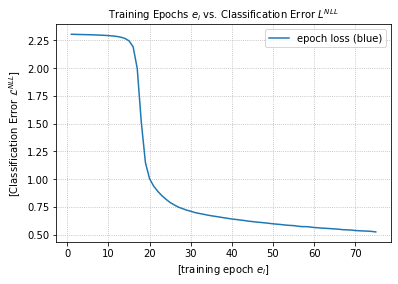

In [23]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot the training epochs vs. the epochs' classification error
ax.plot(np.array(range(1, len(train_epoch_losses)+1)), train_epoch_losses, label='epoch loss (blue)')

# add axis legends
ax.set_xlabel("[training epoch $e_i$]", fontsize=10)
ax.set_ylabel("[Classification Error $\mathcal{L}^{NLL}$]", fontsize=10)

# set plot legend
plt.legend(loc="upper right", numpoints=1, fancybox=True)

# add plot title
plt.title('Training Epochs $e_i$ vs. Classification Error $L^{NLL}$', fontsize=10);

In [24]:
#### Step 4. run model evaluation ####################################################################################

# restore pre-trained model snapshot ( I used the 75 epochs snapshot here )
best_model_name = 'https://github.com/Benemrxr/GSERM2022-Lab-Deep-Learning/blob/main/exam_personal/improved_exam_model_epoch_74.pth?raw=true'

# read stored model from the remote location
model_bytes = urllib.request.urlopen(best_model_name)

# load model tensor from io.BytesIO object
model_buffer = io.BytesIO(model_bytes.read())

# init pre-trained model class
best_model = ExamPassedNet()

# load pre-trained models
best_model.load_state_dict(torch.load(model_buffer, map_location=torch.device('cpu')))

# set model in evaluation mode
best_model.eval()

ExamPassedNet(
  (conv1): Conv2d(1, 28, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(28, 28, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(28, 28, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=252, out_features=120, bias=True)
  (relu1): ReLU(inplace=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (relu2): ReLU(inplace=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

[LOG 20220715-08:40:23] eval-loss: 0.5599368810653687


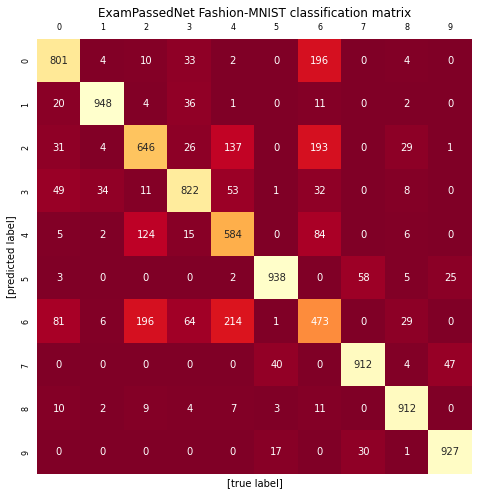

In [25]:
# PyTorch data loader that feeds the (evaluation) image tensors to our neural network:
fashionmnist_eval_dataloader = torch.utils.data.DataLoader(fashion_mnist_eval_data, batch_size=10000, shuffle=False)

# init collection of mini-batch losses
eval_mini_batch_losses = []

# iterate over all-mini batches
for i, (images, labels) in enumerate(fashionmnist_eval_dataloader):

    # run forward pass through the network
    output = best_model(images)

    # determine classification loss
    loss = nll_loss(output, labels)

    # collect mini-batch reconstruction loss
    eval_mini_batch_losses.append(loss.data.item())

# determine mean min-batch loss of epoch
eval_loss = np.mean(eval_mini_batch_losses)

# print epoch loss
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] eval-loss: {}'.format(str(now), str(eval_loss)))
# [LOG 20220714-11:50:32] eval-loss: 0.5599368810653687
# Ok, great. The evaluation loss looks in-line with our training loss.
# And: Better evaluation loss than with the first model, the ExamNet.

# Let's now obtain the predictions for all the Fashion-MNIST images of the evaluation data:
predictions = torch.argmax(best_model(iter(fashionmnist_eval_dataloader).next()[0]), dim=1)

# Furthermore, let's obtain the overall classification accuracy:
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())

# Let's also inspect the confusion matrix of the model predictions to determine major sources of misclassification:
# determine classification matrix of the predicted and target classes
mat = confusion_matrix(fashion_mnist_eval_data.targets, predictions.detach())

# initialize the plot and define size
plt.figure(figsize=(8, 8))

# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fashion_classes, yticklabels=fashion_classes)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# set plot title
plt.title('ExamPassedNet Fashion-MNIST classification matrix')

# set plot axis lables
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

In [26]:
metrics.accuracy_score(fashion_mnist_eval_data.targets, predictions.detach())

0.7963